In [1]:
# Importing the necessary libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import datetime
from operator import itemgetter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict

In [45]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 400)

In [27]:
df = pd.read_pickle("./Data/dataframefull.pickle")
df_user = pd.read_pickle("./Data/users.pickle")
df_month = pd.read_pickle("./Data/months.pickle")

In [6]:
#df_user.to_pickle('./Data/usercomp.pkl', compression='xz')

In [4]:
df_user.head()

,user_id,revenue,women_article,men_article,kids_article,homeandliving_article,avg_shop_cart,total_purchases,avg_cart_itemcount,monday,times_bought_monday,tuesday,times_bought_tuesday,wednesday,times_bought_wednesday,thursday,times_bought_thursday,friday,times_bought_friday,saturday,times_bought_saturday,sunday,times_bought_sunday,user_type,country,region,city,device_category,device_browser,device_os
0,1,147.01,6,1,0,0,73.505,2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,first,Germany,Lower Saxony,Varel,desktop,Firefox,Windows
1,2,208.34,8,0,0,0,208.340,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,first,Germany,Mecklenburg-Vorpommern,Stralsund,desktop,Internet Explorer,Windows
2,3,84.11,0,1,0,0,84.110,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Lower Saxony,Buchholz in der Nordheide,tablet,Safari,iOS
3,4,62.32,1,4,0,0,62.320,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Berlin,Berlin,desktop,Chrome,Windows
4,5,89.89,0,0,4,0,44.945,2,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Schleswig-Holstein,Neumunster,tablet,Safari,iOS


In [5]:
df_month.head()

,year_month,revenue,monthly_growth_revenue,avg_shop_cart,avg_cart_itemcount,active_customers,total_purchases,women_article,men_article,kids_article,homeandliving_article,revenue_first,revenue_established,first_user_count,established_user_count,retained_user_count,retention_rate
0,201711,5.268517e+06,0.000000,103.495016,3.466743,46985,50906,96910,61491,14107,999,5.268517e+06,0.00,46985,0,46985,1.000000
1,201712,4.983451e+06,-0.054108,90.652698,3.284649,50004,54973,95202,64962,15461,1806,4.619641e+06,363809.47,46799,3205,3205,0.064095
2,201801,3.717325e+06,-0.254066,87.034361,3.661563,38221,42711,89365,52416,10983,1100,3.216473e+06,500851.97,33596,4625,3141,0.082180
3,201802,3.056483e+06,-0.177773,90.680675,3.791995,30837,33706,67535,42438,14910,795,2.526812e+06,529670.62,26114,4723,2520,0.081720
4,201803,6.210612e+06,1.031947,108.247849,3.966274,52209,57374,139458,66852,18202,964,5.122223e+06,1088389.01,44512,7697,2797,0.053573


In [28]:
user_dum = pd.get_dummies(df_user.drop(columns=["user_id", "region", "city","country"]))

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
user_scale = scaler.fit_transform(user_dum)

In [10]:
user_scale

array([[-1.73204796,  0.09800314,  0.63914665, ...,  1.25885974,
        -0.00670623, -0.57748318],
       [-1.7320424 ,  0.47186755,  1.043574  , ...,  1.25885974,
        -0.00670623, -0.57748318],
       [-1.73203683, -0.2854319 , -0.5741354 , ..., -0.79436967,
        -0.00670623,  1.73165216],
       ...,
       [ 1.73203504, -0.11242894, -0.37192172, ..., -0.79436967,
        -0.00670623, -0.57748318],
       [ 1.73204061, -0.6190021 , -0.16970805, ..., -0.79436967,
        -0.00670623,  1.73165216],
       [ 1.73204617, -0.41399542, -0.5741354 , ...,  1.25885974,
        -0.00670623, -0.57748318]])

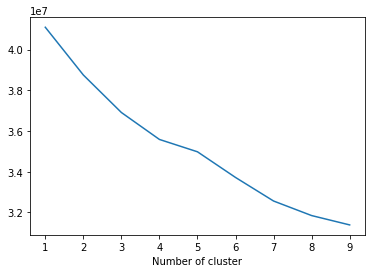

In [37]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_scale)
    df_user["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

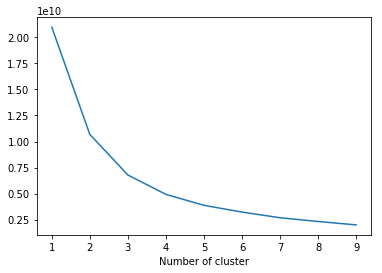

In [29]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_dum)
    df_user["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [30]:
df_user.head()

,user_id,revenue,women_article,men_article,kids_article,homeandliving_article,avg_shop_cart,total_purchases,avg_cart_itemcount,monday,times_bought_monday,tuesday,times_bought_tuesday,wednesday,times_bought_wednesday,thursday,times_bought_thursday,friday,times_bought_friday,saturday,times_bought_saturday,sunday,times_bought_sunday,user_type,country,region,city,device_category,device_browser,device_os,clusters
0,1,147.01,6,1,0,0,73.505,2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,first,Germany,Lower Saxony,Varel,desktop,Firefox,Windows,7
1,2,208.34,8,0,0,0,208.340,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,first,Germany,Mecklenburg-Vorpommern,Stralsund,desktop,Internet Explorer,Windows,3
2,3,84.11,0,1,0,0,84.110,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Lower Saxony,Buchholz in der Nordheide,tablet,Safari,iOS,7
3,4,62.32,1,4,0,0,62.320,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Berlin,Berlin,desktop,Chrome,Windows,0
4,5,89.89,0,0,4,0,44.945,2,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Schleswig-Holstein,Neumunster,tablet,Safari,iOS,0


In [41]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(user_dum)
df_user['Cluster'] = kmeans.predict(user_dum)

In [39]:
df_user.head()

,user_id,revenue,women_article,men_article,kids_article,homeandliving_article,avg_shop_cart,total_purchases,avg_cart_itemcount,monday,times_bought_monday,tuesday,times_bought_tuesday,wednesday,times_bought_wednesday,thursday,times_bought_thursday,friday,times_bought_friday,saturday,times_bought_saturday,sunday,times_bought_sunday,user_type,country,region,city,device_category,device_browser,device_os,clusters,Cluster
0,1,147.01,6,1,0,0,73.505,2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,first,Germany,Lower Saxony,Varel,desktop,Firefox,Windows,3,0
1,2,208.34,8,0,0,0,208.340,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,first,Germany,Mecklenburg-Vorpommern,Stralsund,desktop,Internet Explorer,Windows,3,2
2,3,84.11,0,1,0,0,84.110,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Lower Saxony,Buchholz in der Nordheide,tablet,Safari,iOS,8,0
3,4,62.32,1,4,0,0,62.320,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Berlin,Berlin,desktop,Chrome,Windows,3,0
4,5,89.89,0,0,4,0,44.945,2,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Schleswig-Holstein,Neumunster,tablet,Safari,iOS,8,0


In [21]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final



In [43]:
new = order_cluster('Cluster', 'revenue',df_user,False)

In [34]:
new

,user_id,revenue,women_article,men_article,kids_article,homeandliving_article,avg_shop_cart,total_purchases,avg_cart_itemcount,monday,times_bought_monday,tuesday,times_bought_tuesday,wednesday,times_bought_wednesday,thursday,times_bought_thursday,friday,times_bought_friday,saturday,times_bought_saturday,sunday,times_bought_sunday,user_type,country,region,city,device_category,device_browser,device_os,clusters,Cluster
0,1,147.01,6,1,0,0,73.505000,2,3.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,first,Germany,Lower Saxony,Varel,desktop,Firefox,Windows,7,3
1,3,84.11,0,1,0,0,84.110000,1,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Lower Saxony,Buchholz in der Nordheide,tablet,Safari,iOS,7,3
2,4,62.32,1,4,0,0,62.320000,1,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Berlin,Berlin,desktop,Chrome,Windows,0,3
3,5,89.89,0,0,4,0,44.945000,2,2.000000,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Schleswig-Holstein,Neumunster,tablet,Safari,iOS,0,3
4,6,25.20,1,0,0,0,25.200000,1,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,North Rhine-Westphalia,Meinerzhagen,mobile,Chrome,Android,0,3
5,7,117.63,2,0,0,0,117.630000,1,2.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Bavaria,Munich,mobile,Samsung Internet,Android,7,3
6,8,22.98,0,1,0,0,22.980000,1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,North Rhine-Westphalia,Bochum,mobile,Chrome,Android,0,3
7,9,39.45,5,0,0,0,39.450000,1,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Germany,Berlin,Berlin,mobile,Safari,iOS,0,3
8,11,84.02,2,0,0,0,84.020000,1,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,first,Germany,Bavaria,Augsburg,desktop,Firefox,Windows,7,3
9,12,62.48,2,0,0,0,62.480000,1,2.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first,Austria,Tyrol,Innsbruck,mobile,Chrome,Android,0,3


In [46]:
new.groupby('Cluster').describe()

avg_cart_itemcount                                                    \
                     count      mean       std       min       25%       50%   
Cluster                                                                        
0                   1143.0  7.038863  4.330145  1.339623  4.258333  6.090909   
1                  10504.0  7.193746  4.231252  1.000000  4.220238  6.166667   
2                  57206.0  8.410304  4.805757  1.000000  5.000000  7.500000   
3                 168350.0  4.861031  2.871727  1.000000  3.000000  4.000000   
4                 385414.0  2.257745  1.560571  1.000000  1.000000  2.000000   

                    avg_shop_cart                                     \
          75%   max         count        mean         std        min   
Cluster                                                                
0         8.8  62.0        1143.0  201.067623  128.703339  38.676739   
1         9.0  48.0       10504.0  210.073510  120.733403  30.259310   
2        11.0  54.0       57206.0  260.984594  109.810672  27.126111   
3         6.0  32.0      168350.0  137.216931   44.861063  16.927273   
4         3.0  29.0      385414.0   51.218742   23.879483   0.000000   

                                                      clusters            \
                25%         50%         75%      max     count      mean   
Cluster                                                                    
0        122.297692  174.425000  248.860833  2099.47    1143.0  0.000000   
1        124.522857  185.113095  270.973125  1376.87   10504.0  0.248572   
2        173.075000  260.785000  319.395000   631.82   57206.0  2.258330   
3        109.210000  131.060000  167.820000   240.97  168350.0  2.724704   
4         32.250000   47.050000   67.220000   104.61  385414.0  3.139855   

                                              friday                           \
              std  min  25%  50%  75%  max     count      mean       std  min   
Cluster                                                                         
0        0.000000  0.0  0.0  0.0  0.0  0.0    1143.0  1.784777  1.809939  0.0   
1        1.143181  0.0  0.0  0.0  0.0  8.0   10504.0  0.659368  0.863271  0.0   
2        2.339487  0.0  0.0  2.0  3.0  8.0   57206.0  0.235325  0.489449  0.0   
3        2.321246  0.0  1.0  2.0  3.0  8.0  168350.0  0.185346  0.416199  0.0   
4        2.204307  0.0  2.0  3.0  3.0  8.0  385414.0  0.152011  0.364255  0.0   

                             homeandliving_article                           \
         25%  50%  75%   max                 count      mean       std  min   
Cluster                                                                       
0        1.0  1.0  2.0  15.0                1143.0  0.259843  1.236424  0.0   
1        0.0  0.0  1.0   6.0               10504.0  0.093964  0.623438  0.0   
2        0.0  0.0  0.0   6.0               57206.0  0.036954  0.379205  0.0   
3        0.0  0.0  0.0   5.0              168350.0  0.026083  0.283729  0.0   
4        0.0  0.0  0.0   3.0              385414.0  0.020575  0.191465  0.0   

                             kids_article                                     \
         25%  50%  75%   max        count      mean       std  min  25%  50%   
Cluster                                                                        
0        0.0  0.0  0.0  19.0       1143.0  3.216973  8.541964  0.0  0.0  0.0   
1        0.0  0.0  0.0  14.0      10504.0  1.738957  5.166450  0.0  0.0  0.0   
2        0.0  0.0  0.0  20.0      57206.0  0.738909  2.836753  0.0  0.0  0.0   
3        0.0  0.0  0.0  13.0     168350.0  0.459412  1.945735  0.0  0.0  0.0   
4        0.0  0.0  0.0  10.0     385414.0  0.272523  1.114349  0.0  0.0  0.0   

                    men_article                                             \
         75%    max       count       mean        std  min  25%  50%   75%   
Cluster                                                                      
0        1.5  125.0     

cluster 0 and 1 denote only about 2% of the customers, but these have the highest value <br>
cluster 2 has 57000 users , about 9% of the customers, are still valueable, mostly those customers that purchase more often<br>
cluster 3 a bit more than a average of 1 time customers, but with a way higher avg. purchase value than cluster 4, abput 27% <br> 
cluster 4 customers who mostly bought only once, about 61%